In [3]:
import tarfile
  
# open file
file = tarfile.open('track_features.tar.gz')
  
# extracting file
file.extractall("C:\\Users\\hp\\Desktop\\Mahnoor's Work\\Technocolab internship\\task 3\\Spotify-Skip-Action-Predition-using-Sequencial-User-Data-and-Acoustic-Features-Data\\merge_data")

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
session_data =pd.read_csv('log_mini.csv.gz')
tf0 =pd.read_csv('tf_000000000000.csv')
tf1 =pd.read_csv('tf_000000000001.csv')
track_data = tf0.append(tf1, ignore_index = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_19116\2244995470.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track_data = tf0.append(tf1, ignore_index = True)


In [52]:
track_data.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [53]:
session_data.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [54]:
tf0.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [55]:
tf1.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [56]:
session_data.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

In [57]:
session_track_data = pd.merge(session_data, track_data, on='track_id', how='left')

## Exploratory Data Analysis

In [58]:
session_track_data.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [59]:
session_track_data.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,duration,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,...,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084,215.893484,...,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243,60.223626,...,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,183.503403,...,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,212.027023,...,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,240.800003,...,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000,1787.760986,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [60]:
session_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id                         167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [61]:
session_track_data.duplicated().sum()

0

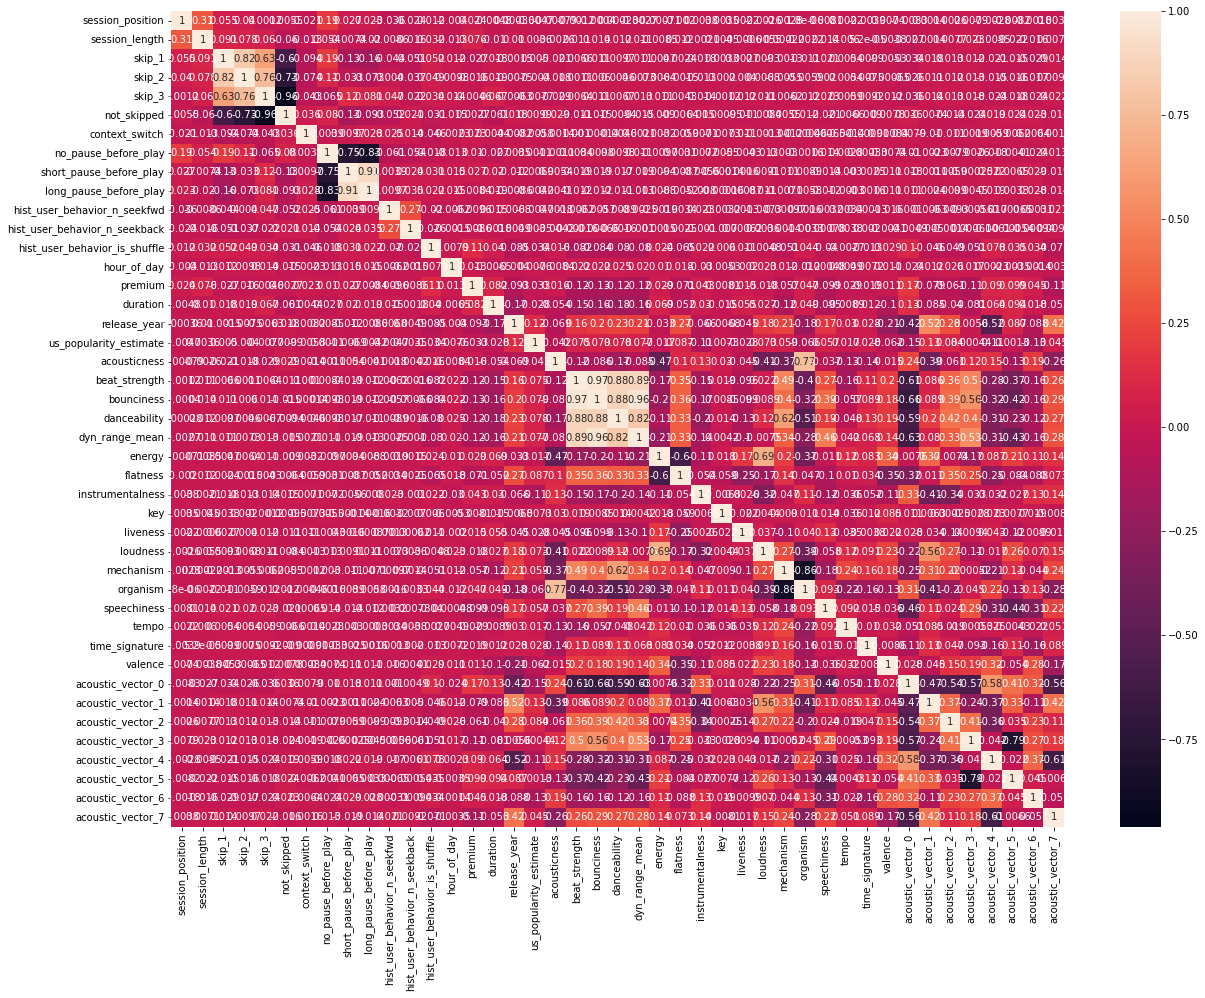

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(session_track_data.corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='skip_1', ylabel='skip_2'>

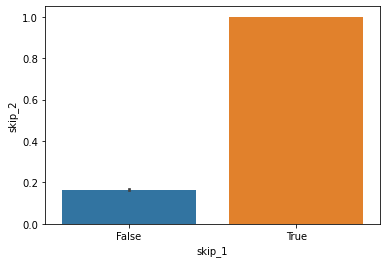

In [63]:
sns.barplot(x = 'skip_1', y= 'skip_2', data = session_track_data)

<AxesSubplot:xlabel='skip_2', ylabel='skip_3'>

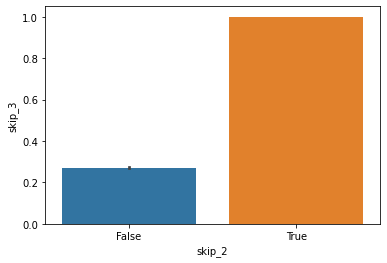

In [64]:
sns.barplot(x = 'skip_2', y= 'skip_3', data = session_track_data)

<AxesSubplot:xlabel='skip_1', ylabel='skip_3'>

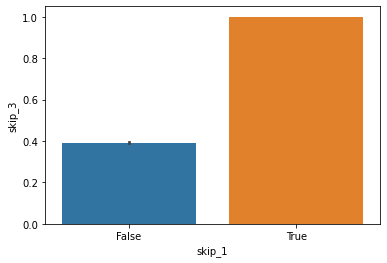

In [65]:
sns.barplot(x = 'skip_1', y= 'skip_3', data = session_track_data)

<AxesSubplot:xlabel='not_skipped', ylabel='skip_3'>

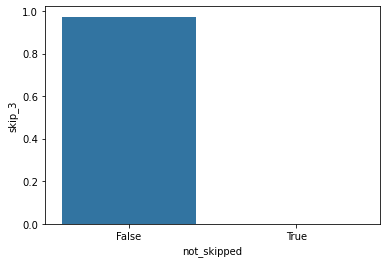

In [66]:
sns.barplot(x = 'not_skipped', y= 'skip_3', data = session_track_data)

<AxesSubplot:xlabel='not_skipped', ylabel='skip_1'>

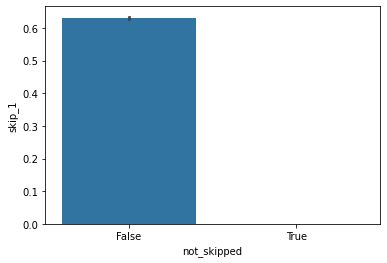

In [67]:
sns.barplot(x = 'not_skipped', y= 'skip_1', data = session_track_data)

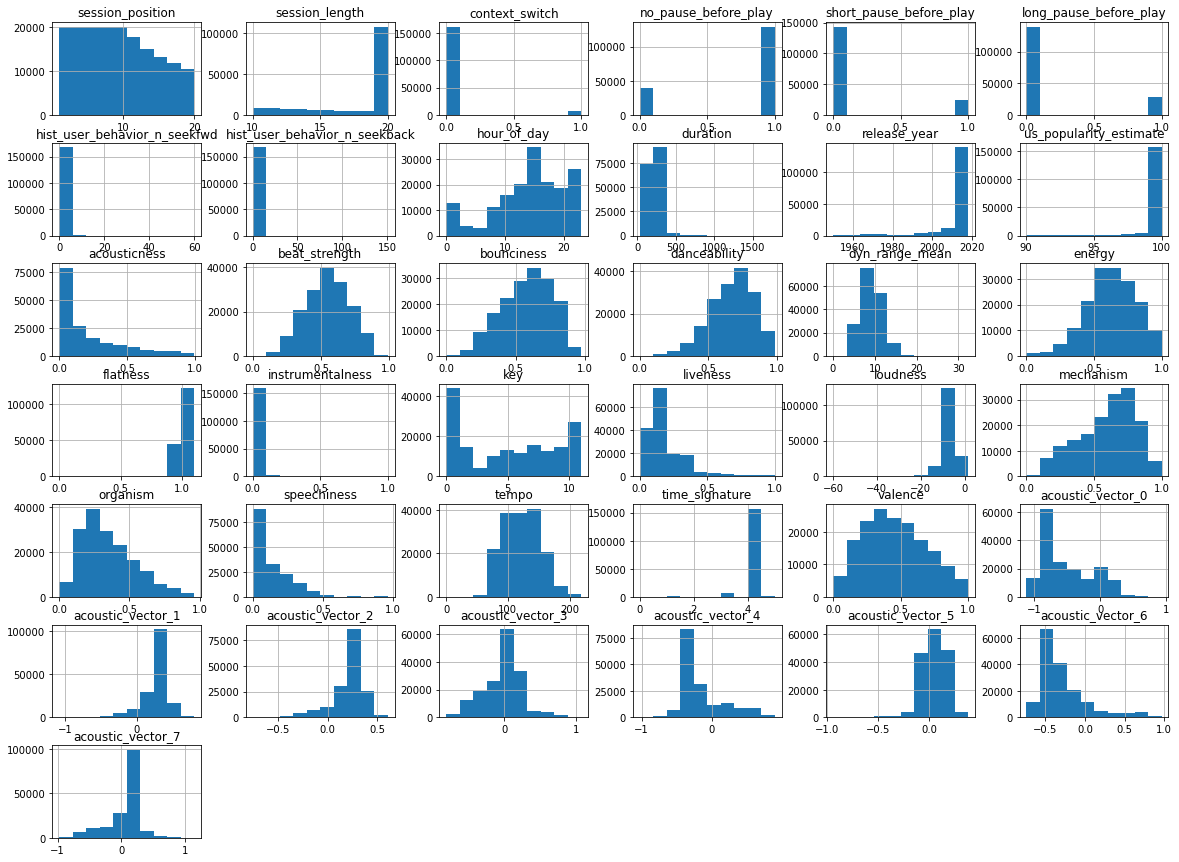

In [68]:
session_track_data.hist(figsize=(20,15))
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


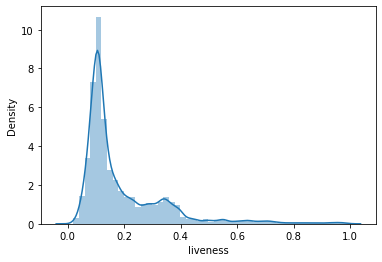

In [69]:
sns.distplot(session_track_data.liveness)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


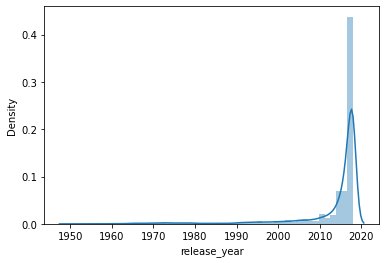

In [70]:
sns.distplot(session_track_data.release_year)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


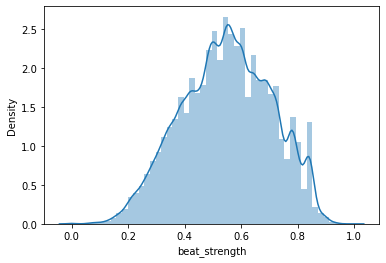

In [71]:
sns.distplot(session_track_data.beat_strength)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


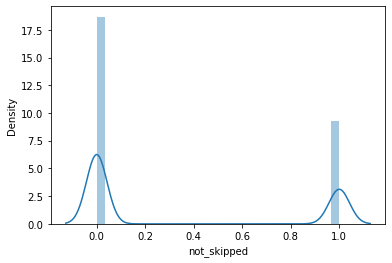

In [72]:
sns.distplot(session_track_data.not_skipped)
plt.show()

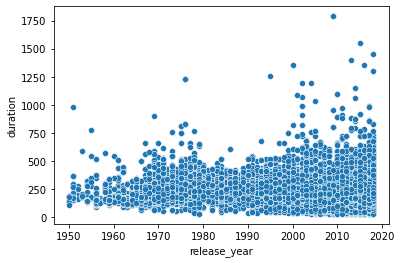

In [73]:
sns.scatterplot(x = 'release_year', y = 'duration', data = session_track_data)
plt.show()

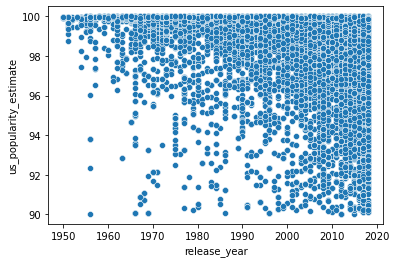

In [74]:
sns.scatterplot(x = 'release_year', y = 'us_popularity_estimate', data = session_track_data)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mode', ylabel='count'>

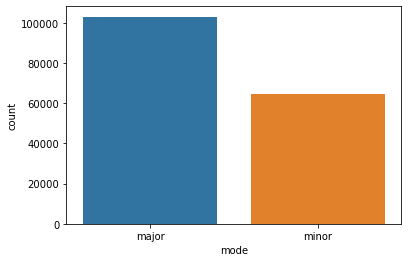

In [75]:
sns.countplot('mode', data = session_track_data)

In [76]:
session_track_data.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object

## One hot encoding

In [41]:
session_track = session_track_data.copy()
session_track['mode'].replace(
    {
        'minor': 0,
        'major': 1
    },
    inplace=True)

In [42]:
session_track.dtypes

session_id                          object
session_position                     int64
session_length                       int64
track_id                            object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
date                                object
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
duration                           float64
release_year                         int64
us_populari

## Feature Engineering

In [43]:
session_track_1 = session_track.copy()
session_track_1['skipped'] =session_track_1['skip_1'] + session_track_1['skip_2'] + session_track_1['skip_3'] 

In [45]:
session_track_1

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0.891322,-0.530003,-0.020507,0.221878,0.232069,0.218059,0.086237,-0.181878,0.145040,False
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0.701824,-0.472023,-0.011628,0.234998,0.169529,0.321254,0.105851,-0.215453,-0.013233,False
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0.961417,-0.628608,0.052259,0.219314,0.238612,0.032383,0.072873,-0.129108,0.214087,False
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0.743112,-0.675257,0.102726,0.123573,0.136240,-0.222776,-0.034961,-0.478699,0.197820,False


In [46]:
session_track_1.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'skipped'],
 

In [47]:
session_track_1 = session_track_1.drop(['skip_1','skip_2','skip_3'], axis = 1)

In [48]:
session_track_1 = session_track_1.drop(['session_length','session_id', 'session_position','premium','short_pause_before_play', 'long_pause_before_play','dyn_range_mean','acousticness',
                                       'dyn_range_mean','acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'], axis = 1)

In [77]:
session_track_1 = session_track_1.reindex(columns=['track_id',  'context_switch',
       'no_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'beat_strength',
       'bounciness', 'danceability', 'energy', 'flatness', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mechanism', 'mode', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence','not_skipped', 'skipped'])



In [78]:
session_track_1.head()

,track_id,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,context_type,hist_user_behavior_reason_start,...,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,not_skipped,skipped
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,True,16,2018-07-15,editorial_playlist,trackdone,...,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,True,False
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,True,16,2018-07-15,editorial_playlist,trackdone,...,-5.319,0.824766,0,0.131391,0.061158,130.037994,4,0.337152,True,False
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,True,16,2018-07-15,editorial_playlist,trackdone,...,-5.843,0.774327,1,0.296923,0.045354,145.028000,4,0.373862,True,False
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,True,16,2018-07-15,editorial_playlist,trackdone,...,-7.756,0.630996,1,0.603271,0.229936,111.982002,4,0.649420,True,False
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,True,16,2018-07-15,editorial_playlist,trackdone,...,-4.919,0.759465,1,0.170148,0.240980,147.031006,4,0.652921,True,False
